<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# <h1 align="center" id="heading">Sentiment Analysis of Reddit Data using Reddit API</h1>

In this live coding session, we leverage the Python Reddit API Wrapper (`PRAW`) to retrieve data from subreddits on [Reddit](https://www.reddit.com), and perform sentiment analysis using [`pipelines`](https://huggingface.co/docs/transformers/main_classes/pipelines) from [HuggingFace ( 🤗 the GitHub of Machine Learning )](https://techcrunch.com/2022/05/09/hugging-face-reaches-2-billion-valuation-to-build-the-github-of-machine-learning/), powered by [transformer](https://arxiv.org/pdf/1706.03762.pdf).

## Objectives

At the end of the session, you will 

- know how to work with APIs
- feel more comfortable navigating thru documentation, even inspecting the source code
- understand what a `pipeline` object is in HuggingFace
- perform sentiment analysis using `pipeline`
- run a python script in command line and get the results

## How to Submit

- At the end of each task, commit* the work into the repository you created before the assignment
- After completing all three tasks, make sure to push the notebook containing all code blocks and output cells to your repository you created before the assignment
- Submit the link to the notebook in Canvas

\***NEVER** commit a notebook displaying errors unless it is instructed otherwise. However, commit often; recall git ABC = **A**lways **B**e **C**ommitting.

## Tasks

### Task I: Instantiate a Reddit API Object

The first task is to instantiate a Reddit API object using [PRAW](https://praw.readthedocs.io/en/stable/), through which you will retrieve data. PRAW is a wrapper for [Reddit API](https://www.reddit.com/dev/api) that makes interacting with the Reddit API easier unless you are already an expert of [`requests`](https://docs.python-requests.org/en/latest/).

#### 1. Install packages

Please ensure you've ran all the cells in the `imports.ipynb`, located [here](https://github.com/FourthBrain/MLE-8/blob/main/assignments/week-3-analyze-sentiment-subreddit/imports.ipynb), to make sure you have all the required packages for today's assignment.

####  2. Create a new app on Reddit 

Create a new app on Reddit and save secret tokens; refer to [post in medium](https://towardsdatascience.com/how-to-use-the-reddit-api-in-python-5e05ddfd1e5c) for more details.

- Create a Reddit account if you don't have one, log into your account.
- To access the API, we need create an app. Slight updates, on the website, you need to navigate to `preference` > `app`, or click [this link](https://www.reddit.com/prefs/apps) and scroll all the way down. 
- Click to create a new app, fill in the **name**, choose `script`, fill in  **description** and **redirect uri** ( The redirect URI is where the user is sent after they've granted OAuth access to your application (more info [here](https://github.com/reddit-archive/reddit/wiki/OAuth2)) For our purpose, you can enter some random url, e.g., www.google.com; as shown below.


    <img src="https://miro.medium.com/max/700/1*lRBvxpIe8J2nZYJ6ucMgHA.png" width="500"/>
- Jot down `client_id` (left upper corner) and `client_secret` 

    NOTE: CLIENT_ID refers to 'personal use script" and CLIENT_SECRET to secret.
    
    <div>
    <img src="https://miro.medium.com/max/700/1*7cGAKth1PMrEf2sHcQWPoA.png" width="300"/>
    </div>

- Create `secrets.py` in the same directory with this notebook, fill in `client_id` and `secret_id` obtained from the last step. We will need to import those constants in the next step.
    ```
    REDDIT_API_CLIENT_ID = "client_id"
    REDDIT_API_CLIENT_SECRET = "secret_id"
    REDDIT_API_USER_AGENT = "any string except bot; ex. My User Agent"
    ```
- Add `secrets.py` to your `.gitignore` file if not already done. NEVER push credentials to a repo, private or public. 

#### 3. Instantiate a `Reddit` object

Now you are ready to create a read-only `Reddit` instance. Refer to [documentation](https://praw.readthedocs.io/en/stable/code_overview/reddit_instance.html) when necessary.

In [1]:
import praw
import secret

# Create a Reddit object which allows us to interact with the Reddit API
reddit = praw.Reddit(
    client_id = secret.REDDIT_API_CLIENT_ID,
    client_secret = secret.REDDIT_API_CLIENT_SECRET,
    user_agent = secret.REDDIT_API_USER_AGENT,
)



In [2]:
print(reddit) 

<details>
<summary>Expected output:</summary>   

```<praw.reddit.Reddit object at 0x10f8a0ac0>```
</details>

#### 4. Instantiate a `subreddit` object

Lastly, create a `subreddit` object for your favorite subreddit and inspect the object. The expected output you will see ar from `r/machinelearning` unless otherwise specified.

In [25]:
# YOUR CODE HERE
subreddit = reddit.subreddit('machinelearning')

What is the display name of the subreddit?

In [26]:
# YOUR CODE HERE
print(subreddit.display_name)

machinelearning


<details>
<summary>Expected output:</summary>   

    machinelearning
</details>

How about its title, is it different from the display name?

In [27]:
# YOUR CODE HERE
subreddit.title

'Machine Learning'

<details>
<summary>Expected output:</summary>   

    Machine Learning
</details>

Print out the description of the subreddit:

In [28]:
# YOUR CODE HERE
print(subreddit.description)

**[Rules For Posts](https://www.reddit.com/r/MachineLearning/about/rules/)**
--------
+[Research](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AResearch)
--------
+[Discussion](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3ADiscussion)
--------
+[Project](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AProject)
--------
+[News](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3ANews)
--------
***[@slashML on Twitter](https://twitter.com/slashML)***
--------
***[Chat with us on Slack](https://join.slack.com/t/rml-talk/shared_invite/enQtNjkyMzI3NjA2NTY2LWY0ZmRjZjNhYjI5NzYwM2Y0YzZhZWNiODQ3ZGFjYmI2NTU3YjE1ZDU5MzM2ZTQ4ZGJmOTFmNWVkMzFiMzVhYjg)***
--------
**Beginners:**
--------
Please have a look at [our FAQ and Link-Collection](http://www.reddit.com/r/MachineLearning/wiki/index)

[Metacademy](http://www.metacademy.org) is a great resource which compiles le

<details>
<summary>Expected output:</summary>

    **[Rules For Posts](https://www.reddit.com/r/MachineLearning/about/rules/)**
    --------
    +[Research](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AResearch)
    --------
    +[Discussion](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3ADiscussion)
    --------
    +[Project](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AProject)
    --------
    +[News](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict
</details>

### Task II: Parse comments

#### 1. Top Posts of All Time

Find titles of top 10 posts of **all time** from your favorite subreddit. Refer to [Obtain Submission Instances from a Subreddit Section](https://praw.readthedocs.io/en/stable/getting_started/quick_start.html)) if necessary. Verify if the titles match what you read on Reddit.

In [29]:
# try run this line, what do you see? press q once you are done
?subreddit.top 

Signature:
subreddit.top(
    *,
    time_filter: str = 'all',
    **generator_kwargs: Union[str, int, Dict[str, str]],
) -> Iterator[Any]
Docstring:
Return a :class:`.ListingGenerator` for top items.

:param time_filter: Can be one of: ``"all"``, ``"day"``, ``"hour"``,
    ``"month"``, ``"week"``, or ``"year"`` (default: ``"all"``).

:raises: :py:class:`ValueError` if ``time_filter`` is invalid.

Additional keyword arguments are passed in the initialization of
:class:`.ListingGenerator`.

This method can be used like:

.. code-block:: python

    reddit.domain("imgur.com").top(time_filter="week")
    reddit.multireddit(redditor="samuraisam", name="programming").top(time_filter="day")
    reddit.redditor("spez").top(time_filter="month")
    reddit.redditor("spez").comments.top(time_filter="year")
    reddit.redditor("spez").submissions.top(time_filter="all")
    reddit.subreddit("all").top(time_filter="hour")
File:      /opt/anaconda3/envs/sa/lib/python3.8/site-packages/praw/models/lis

In [30]:
# YOUR CODE HERE
submissions = subreddit.top(time_filter = "all", limit = 10)

for post in submissions:
    print(post.title)


[Project] From books to presentations in 10s with AR + ML
[D] A Demo from 1993 of 32-year-old Yann LeCun showing off the World's first Convolutional Network for Text Recognition
[R] First Order Motion Model applied to animate paintings
[N] AI can turn old photos into moving Images / Link is given in the comments - You can also turn your old photo like this
[D] This AI reveals how much time politicians stare at their phone at work
[D] Types of Machine Learning Papers
[D] The machine learning community has a toxicity problem
[Project] NEW PYTHON PACKAGE: Sync GAN Art to Music with "Lucid Sonic Dreams"! (Link in Comments)
I made a robot that punishes me if it detects that if I am procrastinating on my assignments [P]
[P] Using oil portraits and First Order Model to bring the paintings back to life


<details> <summary>Expected output:</summary>

    [Project] From books to presentations in 10s with AR + ML
    [D] A Demo from 1993 of 32-year-old Yann LeCun showing off the World's first Convolutional Network for Text Recognition
    [R] First Order Motion Model applied to animate paintings
    [N] AI can turn old photos into moving Images / Link is given in the comments - You can also turn your old photo like this
    [D] This AI reveals how much time politicians stare at their phone at work
    [D] Types of Machine Learning Papers
    [D] The machine learning community has a toxicity problem
    [Project] NEW PYTHON PACKAGE: Sync GAN Art to Music with "Lucid Sonic Dreams"! (Link in Comments)
    [P] Using oil portraits and First Order Model to bring the paintings back to life
    [D] Convolution Neural Network Visualization - Made with Unity 3D and lots of Code / source - stefsietz (IG)    
</details>

#### 2. Top 10 Posts of This Week

What are the titles of the top 10 posts of **this week** from your favorite subreddit?

In [31]:
# YOUR CODE HERE
submissions = subreddit.top(time_filter = "week", limit = 10)

for post in submissions:
    print(post.title)

30% of Google's Reddit Emotions Dataset is Mislabeled [D]
[R] XMem: Very-long-term & accurate Video Object Segmentation; Code & Demo available
[D] Why are Corgi dogs so popular in machine learning (especially in the image generation community)?
[D] Are there any rejected papers that ended up having significant impact in the long run?
[N] Andrej Karpathy is leaving Tesla
[R] BERT-Large: Prune Once for DistilBERT Inference Performance
[R] So someone actually peer-reviewed this and thought "yeah, looks good"?
[P] YOLOv7: Trainable bag-of-freebies sets new state-of-the-art for real-time object detectors
[D] How do you verify the novelty of your research?
[N] BigScience Releases their 176 Billion Parameter Open-access Multilingual Language Model


<details><summary>Expected output:</summary>

    [N] Ian Goodfellow, Apple’s director of machine learning, is leaving the company due to its return to work policy. In a note to staff, he said “I believe strongly that more flexibility would have been the best policy for my team.” He was likely the company’s most cited ML expert.
    [R][P] Thin-Plate Spline Motion Model for Image Animation + Gradio Web Demo
    [P] I’ve been trying to understand the limits of some of the available machine learning models out there. Built an app that lets you try a mix of CLIP from Open AI + Apple’s version of MobileNet, and more directly on your phone's camera roll.
    [R] Meta is releasing a 175B parameter language model
    [N] Hugging Face raised $100M at $2B to double down on community, open-source & ethics
    [P] T-SNE to view and order your Spotify tracks
    [D] : HELP Finding a Book - A book written for Google Engineers about foundational Math to support ML
    [R] Scaled up CLIP-like model (~2B) shows 86% Zero-shot on Imagenet
    [D] Do you use NLTK or Spacy for text preprocessing?
    [D] Democratizing Diffusion Models - LDMs: High-Resolution Image Synthesis with Latent Diffusion Models, a 5-minute paper summary by Casual GAN Papers
</details>

💽❓ Data Question:

Check out what other attributes the `praw.models.Submission` class has in the [docs](https://praw.readthedocs.io/en/stable/code_overview/models/submission.html). 

1. After having a chance to look through the docs, is there any other information that you might want to extract? How might this additional data help you?

*Answer: Extracting the comments from a post may be useful if we are interested in question-type posts, for instance, if we are scraping data to build some sort of web-app/chatbot that answers questions on a specific topic.
Also, information like the score of the post, the number of comments, and the upvote ratio can be useful if we are looking for the posts with more relevance.*

Write a sample piece of code below extracting three additional pieces of information from the submission below.

In [32]:
# YOUR CODE HERE
submissions = subreddit.top(time_filter = "week", limit = 10)

post_info = "Post '{title}' has score {score}, upvote ratio {upvote_ratio} and a total of {num_comments} comments"

for post in submissions:
    print(post_info.format(title = post.title, score = post.score, upvote_ratio = post.upvote_ratio, num_comments = post.num_comments))

Post '30% of Google's Reddit Emotions Dataset is Mislabeled [D]' has score 873, upvote ratio 0.98 and a total of 136 comments
Post '[R] XMem: Very-long-term & accurate Video Object Segmentation; Code & Demo available' has score 696, upvote ratio 0.98 and a total of 28 comments
Post '[D] Why are Corgi dogs so popular in machine learning (especially in the image generation community)?' has score 320, upvote ratio 0.92 and a total of 68 comments
Post '[D] Are there any rejected papers that ended up having significant impact in the long run?' has score 298, upvote ratio 0.98 and a total of 108 comments
Post '[N] Andrej Karpathy is leaving Tesla' has score 275, upvote ratio 0.95 and a total of 127 comments
Post '[R] BERT-Large: Prune Once for DistilBERT Inference Performance' has score 260, upvote ratio 0.99 and a total of 19 comments
Post '[R] So someone actually peer-reviewed this and thought "yeah, looks good"?' has score 238, upvote ratio 0.96 and a total of 81 comments
Post '[P] YOLOv7

💽❓ Data Question:

2. Is there any information available that might be a concern when it comes to Ethical Data? 

*Answer : I think exposing the time the post was created might give approximate information about the location or time zone of the author, this information is not shown explicitly on the reddit website (it shows how many hours/days/months have passed since the creation of the post but not an exact time or date)*

#### 3. Comment Code

Add comments to the code block below to describe what each line of the code does (Refer to [Obtain Comment Instances Section](https://praw.readthedocs.io/en/stable/getting_started/quick_start.html) when necessary). The code is adapted from [this tutorial](https://praw.readthedocs.io/en/stable/tutorials/comments.html)

The purpose is 
1. to understand what the code is doing 
2. start to comment your code whenever it is not self-explantory if you have not (others will thank you, YOU will thank you later 😊) 

In [33]:
%%time
from praw.models import MoreComments

# A list containing the text (body) of top comments
top_comments = []

# Iterate through the top 10 posts in the subreddit
for submission in subreddit.top(limit=10):
    # Iterate through the list of top level comments
    for top_level_comment in submission.comments:
        # Check if top-level comment is a MoreComments object, if yes we skip it
        if isinstance(top_level_comment, MoreComments):
            continue
        # append the text of the comments to the list
        top_comments.append(top_level_comment.body)

CPU times: user 521 ms, sys: 103 ms, total: 624 ms
Wall time: 15.5 s


#### 4. Inspect Comments

How many comments did you extract from the last step? Examine a few comments. 

In [22]:
#YOUR CODE HERE  # the answer may vary 693 for r/machinelearning
len(top_comments)

170

In [34]:
import random

[random.choice(top_comments) for i in range(5)]

["When DJ Weasely's dropping bangers in the common room",
 'u/thatdjgirl',
 'Keyboard name? Also which pre-trained model did you use?',
 'Omg! Thats awesome!!! I had a similar idea but using text',
 'Wonder what was the RAM and computing power of the system.']

<details> <summary>Some of the comments from `r/machinelearning` subreddit are:</summary>

    ['Awesome visualisation',
    'Similar to a stack or connected neurons.',
    'Will this Turing pass the Turing Test?']
</details>

💽❓ Data Question:

3. After having a chance to review a few samples of 5 comments from the subreddit, what can you say about the data? 

*Answer: Not all comments are of good quality or informative, a lot of them are sarcastic/ironic or involve humor (this might be specific to Reddit). For the purpose of sentiment analysis, some comments that include irony or sarcasm might be classified incorrectly. Also, among those that can be considered positive there are some that don't directly relate to Machine Learning* 

HINT: Think about the "cleanliness" of the data, the content of the data, think about what you're trying to do - how does this data line up with your goal?

#### 5. Extract Top Level Comment from Subreddit `TSLA`.

Write your code to extract top level comments from the top 10 topics of a time period, e.g., year, from subreddit `TSLA` and store them in a list `top_comments_tsla`.  

In [35]:
# YOUR CODE HERE

subreddit = reddit.subreddit('TSLA')
submissions = subreddit.top(time_filter = "year", limit = 10)

#List containing the top-level comments of the top-10 topics in the TSLA subreddit
top_comments_tsla = []

# Iterate through the top 10 posts in the subreddit TSLA
for submission in subreddit.top(limit=10):
    # Iterate through the list of top level comments in the submission
    for top_level_comment in submission.comments:
        # Check if top-level comment is a MoreComments object, if yes we skip it
        if isinstance(top_level_comment, MoreComments):
            continue
        # append the text of the comments to the list
        top_comments_tsla.append(top_level_comment.body)


In [36]:
len(top_comments_tsla) # Expected: 174 for r/machinelearning

170

In [37]:
[random.choice(top_comments_tsla) for i in range(5)]

['yeah it probably bounces a bit on its way to $300 EoY',
 'When are you all buying $DOGE, and how much will you all buy?',
 "Holing 300 at $870. It fucking hurts and kick myself for throwing that much at ATH's. Thankfully I don't need to liquidate any of it so I can ride it out",
 'This was def just a prediction. Not an insider. He keep Rick rolling people -_____-',
 "What will happen if you post that GME it's the new buy target from them? 🤣"]

<details>
<summary>Some of the comments from `r/TSLA` subreddit:</summary>

    ['I bought puts',
    '100%',
    'Yes. And I’m bag holding 1200 calls for Friday and am close to throwing myself out the window']
</details>

💽❓ Data Question:

4. Now that you've had a chance to review another subreddits comments, do you see any differences in the kinds of comments either subreddit has - and how might this relate to bias?

* Answer: Some of the comments seem to have no information directly related to Tesla stock, although it is hard to tell without knowing the content of the posts themselves.   Also the TSLA subreddit seems to be have a positive bias toward the Tesla company, this can be problematic if we are going to suggest decisions based only on information from this subreddit.* 

### Task III: Sentiment Analysis

Let us analyze the sentiment of comments scraped from `r/TSLA` using a pre-trained HuggingFace model to make the inference. Take a [Quick tour](https://huggingface.co/docs/transformers/quicktour). 

#### 1. Import `pipeline`

In [38]:
from transformers import pipeline

#### 2. Create a Pipeline to Perform Task "sentiment-analysis"

In [39]:
sentiment_model = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


#### 3. Get one comment from list `top_comments_tsla` from Task II - 5.

In [40]:
random.seed(42)
comment = random.choice(top_comments_tsla)

In [41]:
comment

"Just maybe it's happening now, adjusting value to expected earnings in an ever more competitive market"

The example comment is: `'Bury Burry!!!!!'`. Print out what you get. For reproducibility, use the same comment in the next step; consider setting a seed.

#### 4. Make Inference!

In [42]:
sentiment = sentiment_model(comment)
type(sentiment)

list

What is the type of the output `sentiment`?

*Answer: The type is 'list', each entry of the list is a dictionary with the label for the comment (representing the class assigned) and a score (probability the comment is in the class)* 

In [50]:
print(f'The comment: {comment}')
print(f'Predicted Label is {sentiment[0]["label"]} and the score is {sentiment[0]["score"]:.3f}')

The comment: Just maybe it's happening now, adjusting value to expected earnings in an ever more competitive market
Predicted Label is NEU and the score is 0.896


For the example comment, the output is:

    The comment: Bury Burry!!!!!
    Predicted Label is NEGATIVE and the score is 0.989

🖥️❓ Model Question:

1. What does the score represent?

*Answer: The score represents the probability that the comment has the label predicted by the model.*

### Task IV: Put All Together

Let's pull all the piece together, create a simple script that does 

- get the subreddit
- get comments from the top posts for given subreddit
- run sentiment analysis 

#### Complete the Script

Once you complete the code, running the following block writes the code into a new Python script and saves it as `top_tlsa_comment_sentiment.py` under the same directory with the notebook. 

In [43]:
%%writefile top_tlsa_comment_sentiment.py

import secret
import random

from typing import Dict, List

from praw import Reddit
from praw.models.reddit.subreddit import Subreddit
from praw.models import MoreComments

from transformers import pipeline


def get_subreddit(display_name:str) -> Subreddit:
    """Get subreddit object from display name

    Args:
        display_name (str): [description]

    Returns:
        Subreddit: [description]
    """
    reddit = Reddit(
        client_id=secret.REDDIT_API_CLIENT_ID,        
        client_secret=secret.REDDIT_API_CLIENT_SECRET,
        user_agent=secret.REDDIT_API_USER_AGENT
        )
    
    subreddit = reddit.subreddit(display_name)
    return subreddit

def get_comments(subreddit:Subreddit, limit:int=3) -> List[str]:
    """ Get comments from subreddit

    Args:
        subreddit (Subreddit): [description]
        limit (int, optional): [description]. Defaults to 3.

    Returns:
        List[str]: List of comments
    """
    top_comments = []
    for submission in subreddit.top(limit=limit):
        for top_level_comment in submission.comments:
            if isinstance(top_level_comment, MoreComments):
                continue
            top_comments.append(top_level_comment.body)
    return top_comments

def run_sentiment_analysis(comment:str) -> Dict:
    """Run sentiment analysis on comment using default distilbert model
    
    Args:
        comment (str): [description]
        
    Returns:
        str: Sentiment analysis result
    """
    sentiment_model = pipeline("sentiment-analysis")
    sentiment = sentiment_model(comment)
    return sentiment[0]


if __name__ == '__main__':
    subreddit = get_subreddit('TSLA')
    comments = get_comments(subreddit)
    comment = comments[0]
    sentiment = run_sentiment_analysis(comment)
    
    print(f'The comment: {comment}')
    print(f'Predicted Label is {sentiment["label"]} and the score is {sentiment["score"]:.3f}')

Overwriting top_tlsa_comment_sentiment.py


Run the following block to see the output.

In [44]:
!python top_tlsa_comment_sentiment.py

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
The comment: ho lee fuk 

you got anymore insider information? 👀👀
Predicted Label is NEGATIVE and the score is 0.994


<details><summary> Expected output:</summary>

    No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
    The comment: When is DOGE flying
    Predicted Label is POSITIVE and the score is 0.689
</details>

💽❓ Data Question:

5. Is the subreddit active? About how many posts or threads per day? How could you find this information?

*Answer: The average number of posts is between 2 and 3 per day, so it is not a very active subreddit.*

In [45]:
import pandas as pd
from datetime import datetime

submissions = subreddit.top(time_filter = "all", limit = 1000)
data = []

#we collect all the relevant data on the posts of the subreddit
for post in submissions:
    title = post.title
    author = post.author
    score = post.score
    utc_time = datetime.utcfromtimestamp(post.created_utc)
    date =  utc_time.strftime("%Y-%m-%d")
    num_comments = submission.num_comments
    data.append([author, score, date, utc_time, num_comments])    

In [51]:
df_tesla_posts = pd.DataFrame(data, columns=['Author', 'Score', 'Date', 'UTC_Time', 'Comments'])
df_tesla_posts.head()

print('The average number of posts per day is', df_tesla_posts['Date'].value_counts().mean())



The average number of posts per day is 2.454780361757106


💽❓ Data Question:

6. Does there seem to be a large distribution of posters or a smaller concentration of posters who are very active? What kind of impact might this have on the data?

* Answer: There is definitely a small concentration of posters who are more active: about 20 posters have more than 10 posts, and the top 4 posters have 50, 49, 40, and 20 posts respectively. There is also about 325 posters with only one post. So definitely the data is biased toward the opinions of the top posters. One way to remedy this would be to limit the number of posts per user (a limit per week or month) but this could introduce some loss of information.* 


In [55]:
df_tesla_posts['Author'].value_counts()

droneauto               50
wewewawa                49
productism              40
JohnnyCas2031           20
ExplanationGeneral31    15
                        ..
B0ttlecape               1
Coco8201990              1
justin_linn              1
jackassesunite           1
TSLA75                   1
Name: Author, Length: 445, dtype: int64

In [91]:
df_tesla_posts['Author'].value_counts(normalize=True)*100

droneauto               5.376344
wewewawa                5.268817
productism              4.301075
JohnnyCas2031           2.150538
ExplanationGeneral31    1.612903
                          ...   
B0ttlecape              0.107527
Coco8201990             0.107527
justin_linn             0.107527
jackassesunite          0.107527
TSLA75                  0.107527
Name: Author, Length: 445, dtype: float64

<AxesSubplot:>

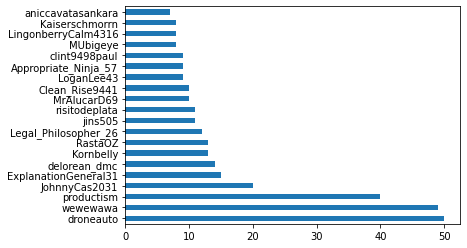

In [92]:
df_tesla_posts['Author'].value_counts()[0:20].plot(kind='barh')
